# Exercise 3.8
Repeat the previous exercise, assuming you had a known background of 3.2 events.

(a) Find the Feldman-Cousins 68% Confidence Level interval

(b) Find the Neyman 68% Confidence Level interval\\

(c) Find the 68 % Credible interval for $\nu$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
m = np.math
from scipy.stats import poisson

In [2]:
mu_bkg = 3.2
n_obs = 9

In [3]:
def poisson(x, n):
    return np.exp(-x)*(np.power(x,n))/m.factorial(n)

In [4]:
stepsize = 1./1000
mu = np.arange(0,50,stepsize)
y = poisson(mu, 9)

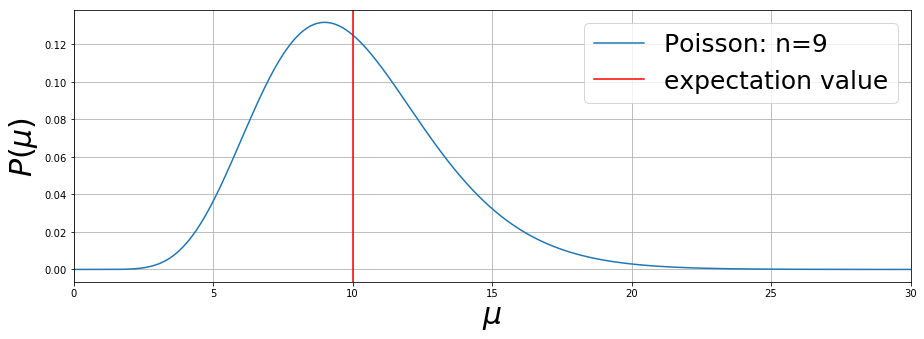

In [5]:
plt.figure(figsize=(15, 5))
plt.plot(mu, y, label="Poisson: n=9")
plt.axvline([n_obs+1], color='red', label="expectation value")
plt.grid()
plt.legend(fontsize=25)
plt.xlim(0,30)
plt.xlabel(r"$\mu$", fontsize=30)
plt.ylabel(r"$P(\mu)$", fontsize=30)
plt.show()

# a)

In [6]:
from scipy.stats import poisson
import math

In [7]:
# Calculate the Feldman-Cousins ratio
def Feldman_Cousins_r(n, mu_signal, mu_bkg):
    mu_optimal = max(n, mu_bkg)
    r = poisson.pmf(n, mu_signal+mu_bkg) / poisson.pmf(n, mu_optimal)
    return r

In [8]:
# As usual, but this time using the Feldman cousins ratio
def smallest_interval_FC(mu_signal, mu_bkg, nMax, alpha):
    Ns = []
    FeldmanCousin_r = []
    for n in range(0,nMax):
        Ns.append(n)
        #P_binoms.append(binom.pmf(r, N, p))
        FeldmanCousin_r.append(Feldman_Cousins_r(n, mu_signal, mu_bkg))
    l = list(sorted(zip(FeldmanCousin_r, Ns), reverse=True))
    
    s = 0
    i = 0
    n_min = 0
    n_max = nMax
    est = l[0][1]
    

    while(s < 1-alpha):
        s += poisson.pmf(l[i][1], mu_signal+mu_bkg)
        if(l[i][1] >= est):
            n_max = l[i][1]
        else:
            n_min = l[i][1]
        i=i+1
        
    return n_min, n_max

In [9]:
#mu_signal = n_obs - mu_bkg
mu_signal = 5.0
Ns = []
Ps = []
Fs = []
FeldmanCousin_r = []
rank = []

for n in range(0,25):
    FeldmanCousin_r.append(Feldman_Cousins_r(n, mu_signal, mu_bkg))
    Ns.append(n)
    Ps.append(poisson.pmf(n,mu_signal+mu_bkg))
    rank.append(n)

l = list(sorted(zip(FeldmanCousin_r, Ns, Ps), reverse=True))

s = 0
for n in range(0,25):
    s += l[n][2]
    Fs.append(s)

ll = list(sorted(zip(rank, l, Fs), key=lambda e: e[1][1]))

print("n\tFieldman-Cousin r\tP(n|mu)\t\tFC rank \tF")
for n in range(0,25):
    print(str(ll[n][1][1])+ '\t' +str(round(ll[n][1][0],5))  + '\t\t\t' +str(round(ll[n][1][2],5)) + "\t\t" +str(ll[n][0]) + "\t\t" + str(round(ll[n][2],5)))

n	Fieldman-Cousin r	P(n|mu)		FC rank 	F
0	0.00674			0.00027		18		0.99914
1	0.01727			0.00225		16		0.99766
2	0.04424			0.00923		14		0.99276
3	0.11338			0.02524		11		0.96734
4	0.26484			0.05174		9		0.92252
5	0.48359			0.08485		6		0.78436
6	0.72198			0.11597		4		0.62196
7	0.91171			0.13585		2		0.40196
8	0.99754			0.13924		0		0.13924
9	0.96289			0.12687		1		0.26611
10	0.83151			0.10403		3		0.50599
11	0.64962			0.07755		5		0.69951
12	0.46335			0.05299		7		0.83735
13	0.30404			0.03343		8		0.87078
14	0.18472			0.01958		10		0.9421
15	0.10448			0.0107		12		0.97804
16	0.05528			0.00549		13		0.98352
17	0.02748			0.00265		15		0.9954
18	0.01288			0.00121		17		0.99886
19	0.00571			0.00052		19		0.99966
20	0.0024			0.00021		20		0.99987
21	0.00096			8e-05		21		0.99995
22	0.00037			3e-05		22		0.99998
23	0.00013			1e-05		23		0.99999
24	5e-05			0.0		24		1.0


In [10]:
# Produce Neyman Confidence Levels
def neyman_CL(nMax=20,interval='CI',alpha=0.32):
    stepsize = nMax/1000.
    nu_values = np.arange(0,nMax,stepsize)
    n_min = []
    n_max = []
    
    nu_bkg = 3.2

    for nu in nu_values:
        if interval == 'CI':
            n1, n2 = central_interval(nu, nMax+5*int(math.sqrt(nMax)), alpha)
        elif interval == 'FC':
            n1, n2 = smallest_interval_FC(nu-nu_bkg,nu_bkg, nMax+5*int(math.sqrt(nMax)), alpha)
        n_min.append(n1)
        n_max.append(n2)
    return np.array(n_min), np.array(n_max), nu_values

In [11]:
nMax = 25
n_min_FC, n_max_FC, mu_values = neyman_CL(nMax, "FC", 0.32)
mus_min_FC = list()
mus_max_FC = list()
for i in range(0,len(mu_values)):
    if n_min_FC[i] <= 9:
        mus_max_FC.append(mu_values[i])
    if n_max_FC[i] >= 9:
        mus_min_FC.append(mu_values[i])
mu_min_FC = min(mus_min_FC)
mu_max_FC = max(mus_max_FC)

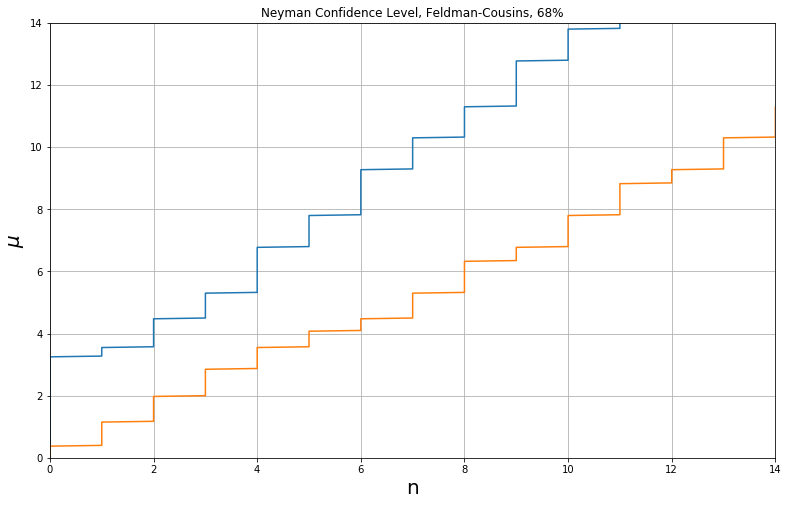

Feldman-Cousins smallest interval S+B: [6.35, 12.775] 68%CL


In [12]:
plt.figure(figsize = (13,8))
plt.plot(n_min_FC,mu_values)
plt.plot(n_max_FC,mu_values)
plt.xlabel('n',fontsize=20)
plt.ylabel(r"$\mu$",fontsize=20)
plt.xlim([0,14])
plt.ylim([0,14])
plt.title('Neyman Confidence Level, Feldman-Cousins, 68%')
plt.grid(True)
plt.show()
print("Feldman-Cousins smallest interval S+B: [" + str(mu_min_FC) + ", " + str(mu_max_FC) + "] 68%CL")

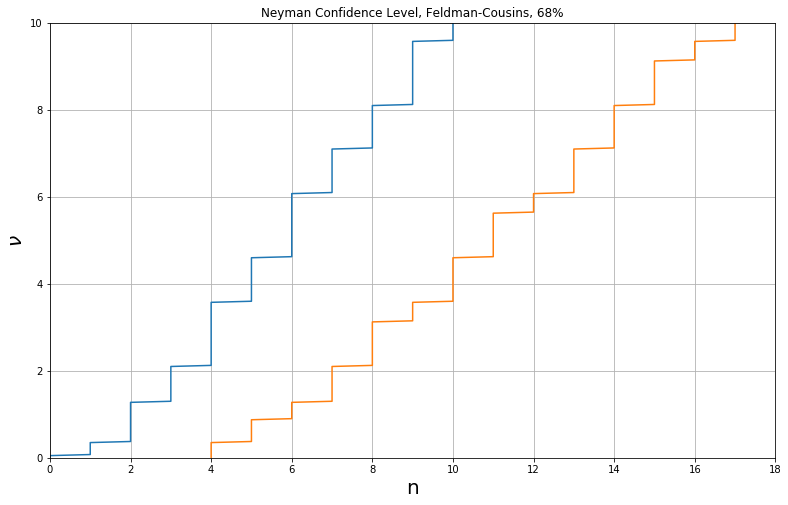

In [14]:
plt.figure(figsize = (13,8))
plt.plot(n_min_FC,mu_values-mu_bkg)
plt.plot(n_max_FC,mu_values-mu_bkg)
plt.xlabel('n',fontsize=20)
plt.ylabel(r"$\nu$",fontsize=20)
plt.xlim([0,18])
plt.ylim([0,10])
plt.title('Neyman Confidence Level, Feldman-Cousins, 68%')
plt.grid(True)
plt.show()

In [15]:

#print("mu",mu_min_FC, mu_max_FC)
print("Results for 3.8. a)\n")

print("Feldman-Cousins smallest interval: [" + str(mu_min_FC-mu_bkg) + ", " + str(mu_max_FC-mu_bkg) + "] 68%CL")

Results for 3.8. a)

Feldman-Cousins smallest interval: [3.15, 9.575] 68%CL


# b) Neyman with Central Interval

In [16]:
# calculating the boundaries of the central interval
def central_interval(nu, nMax, alpha):
    n_min = 0
    s = poisson.pmf(0, nu)
    while s <= alpha/2:
        n_min += 1
        s += poisson.pmf(n_min, nu)

    n_max = int(nMax)
    s = poisson.pmf(n_max, nu)
    while s <= alpha/2:
        n_max -= 1
        #s += binom.pmf(r_max, N, p)
        s += poisson.pmf(n_max, nu)
  
    return n_min, n_max

In [17]:
nMax = 25
n_min, n_max, mu_values = neyman_CL(nMax, "CI", 0.32)
mus_min = list()
mus_max = list()
for i in range(0,len(mu_values)):
    if n_min[i] <= 9:
        mus_max.append(mu_values[i])
    if n_max[i] >= 9:
        mus_min.append(mu_values[i])
mu_min = min(mus_min)
mu_max = max(mus_max)

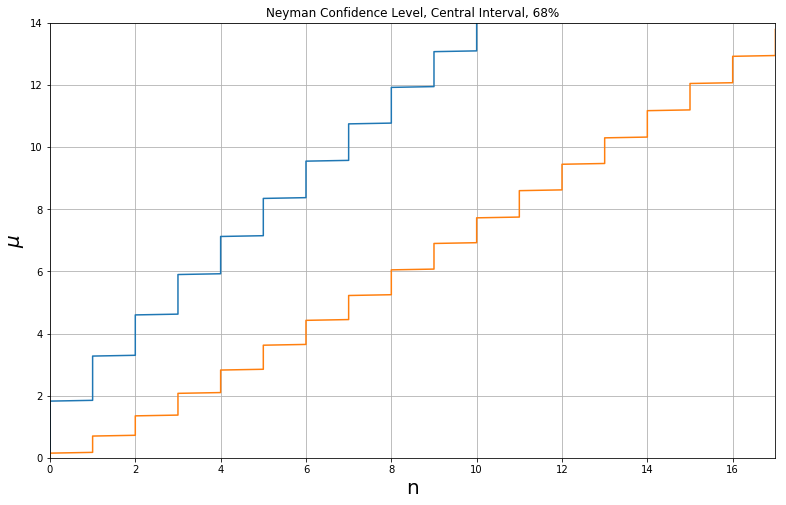

Neyman Central interval S+B: [6.075, 13.075] 68%CL


In [18]:
plt.figure(figsize = (13,8))
plt.plot(n_min,mu_values)
plt.plot(n_max,mu_values)
plt.xlabel('n',fontsize=20)
plt.ylabel(r'$\mu$',fontsize=20)
plt.xlim([0,17])
plt.ylim([0,14])
plt.title('Neyman Confidence Level, Central Interval, 68%')
plt.grid(True)
plt.show()
print("Neyman Central interval S+B: [" + str(mu_min) + ", " + str(mu_max) + "] 68%CL")

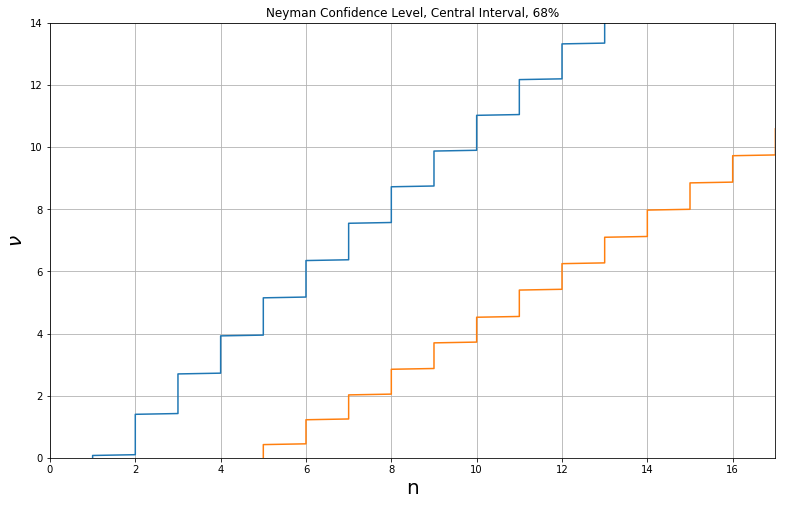

In [19]:
plt.figure(figsize = (13,8))
plt.plot(n_min,mu_values-mu_bkg)
plt.plot(n_max,mu_values-mu_bkg)
plt.xlabel('n',fontsize=20)
plt.ylabel(r'$\nu$',fontsize=20)
plt.xlim([0,17])
plt.ylim([0,14])
plt.title('Neyman Confidence Level, Central Interval, 68%')
plt.grid(True)
plt.show()

In [20]:

#print("mu",  mu_min, mu_max)
print("Results for 3.8. b)\n")
print("Neyman Central interval: [" + str(mu_min-mu_bkg) + ", " + str(mu_max-mu_bkg) + "] 68%CL")

Results for 3.8. b)

Neyman Central interval: [2.875, 9.875] 68%CL


# c)

In [21]:
# In the lecture we saw, that the posterior can be defined as follows
def posterior(mu_signal, mu_bkg, n):
    numerator = np.exp(-mu_signal)*pow(mu_signal+mu_bkg, n)
    denominator = math.factorial(n)
    s = 0
    for i in range (0,n+1):
        s += pow(mu_bkg,i)/float(math.factorial(i))
    denominator = denominator*float(s)
    return numerator / float(denominator)

In [22]:
def smallest_interval_bayesian(alpha, stepsize):
    l = list(sorted(zip(posterior_values, Nus), reverse=True))
    count = 0.
    i = 0
    x_min = x_max = 0
    #nu_mode = mu_signal # mode
    nu_mode=l[0][1]
    while count < (1-alpha):
        count+= l[i][0]*stepsize
        if(l[i][1] >= nu_mode):
            x_max = l[i][1]
        else:
            x_min = l[i][1]
        i=i+1
    return x_min, x_max, count

In [23]:
Nus = np.arange(0,20,1/1000.)
posterior_values = []
for nu in Nus:
    posterior_values.append(posterior(nu, mu_bkg, n_obs))

In [24]:
nu_min_bayes, nu_max_bayes, p_contained = smallest_interval_bayesian(0.32,1/1000.)

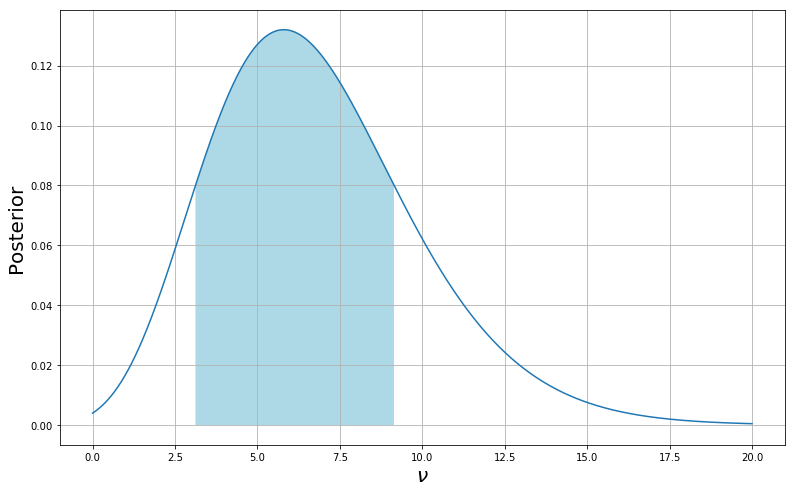

In [25]:
plt.figure(figsize=(13,8))
plt.plot(Nus, posterior_values)
plt.xlabel(r'$\nu$',fontsize=20)
plt.ylabel('Posterior',fontsize=20)
plt.grid(True)
plt.fill_between(np.arange(nu_min_bayes,nu_max_bayes,0.01), posterior(np.arange(nu_min_bayes,nu_max_bayes,0.01), 3.2, 9), facecolor='lightblue' )
plt.show()

In [26]:
print("Overview 68% Intervals:")
print("Feldman-Cousins:\t [" + str(mu_min_FC-mu_bkg) + ", " + str(mu_max_FC-mu_bkg))+"]"
print("Neyman CI:\t\t [" + str(mu_min-mu_bkg) + ", " + str(mu_max-mu_bkg))+"]"
print("Bayes SI:\t\t [" + str(nu_min_bayes) + ", " + str(nu_max_bayes))+"]"

Overview 68% Intervals:
Feldman-Cousins:	 [3.15, 9.575]
Neyman CI:		 [2.875, 9.875]
Bayes SI:		 [3.121, 9.146]
